Epoch 1/5


c:\Users\REVATHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:86: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


391/391 ━━━━━━━━━━━━━━━━━━━━ 65s 161ms/step - accuracy: 0.5472 - loss: 0.6751 - val_accuracy: 0.5883 - val_loss: 0.6403 - learning_rate: 0.0010
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 64s 164ms/step - accuracy: 0.6154 - loss: 0.6160 - val_accuracy: 0.8227 - val_loss: 0.4509 - learning_rate: 0.0010
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 86s 220ms/step - accuracy: 0.8344 - loss: 0.4152 - val_accuracy: 0.6460 - val_loss: 0.5991 - learning_rate: 0.0010
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step - accuracy: 0.7225 - loss: 0.5188
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
391/391 ━━━━━━━━━━━━━━━━━━━━ 76s 195ms/step - accuracy: 0.7225 - loss: 0.5188 - val_accuracy: 0.7465 - val_loss: 0.5287 - learning_rate: 0.0010
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 60s 152ms/step - accuracy: 0.8587 - loss: 0.3679 - val_accuracy: 0.8391 - val_loss: 0.3884 - learning_rate: 5.0000e-04
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8369 - loss: 0.3920
Test a

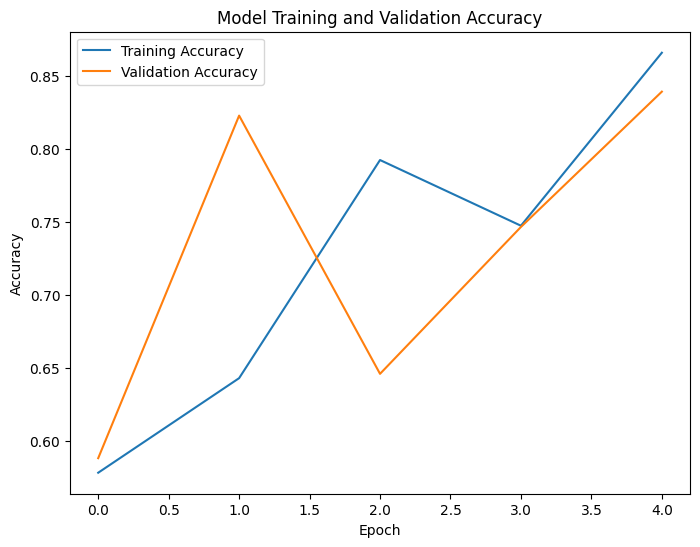

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load the IMDb movie reviews dataset
VOCAB_SIZE = 10000
MAX_SEQUENCE_LENGTH = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=VOCAB_SIZE)

# Preprocess the text data (tokenization, padding)
x_train = pad_sequences(x_train, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
x_test = pad_sequences(x_test, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# Build a simple RNN model
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=128,
              input_length=MAX_SEQUENCE_LENGTH),
    LSTM(64),
    Dense(1, activation='sigmoid')
])
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_data=(x_test, y_test),
                    callbacks=[ReduceLROnPlateau(factor=0.5, patience=2, verbose=1)])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

# Define a learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=3, min_lr=1e-6)

# Hyperparameter optimization (you can modify these values)
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
optimizers = ['adam', 'rmsprop']

best_accuracy = 0.0
best_lr, best_batch_size, best_optimizer = None, None, None

for lr in learning_rates:
    for batch_size in batch_sizes:
        for optimizer in optimizers:
            
# Visualize training history
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Training and Validation Accuracy')
plt.legend()
plt.show()